<H2>Prediction using supervised model</H2>

<h4>In this project we are going to predict the percentage of a student based on the no. of study hours using simple linear regression.</h4>
<h5>Language:<b>PYTHON</b></h5>

<H4>STEP 1:<B>Libraries</B><H4>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn import metrics

<H4>STEP 2:<B>Fetch data</B><H4>

In [5]:
url="http://bit.ly/w-data"
student_data=pd.read_csv(url)
print("data successfully imported")
student_data

data successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<h4><b>Plotting the distribution of scores</b></h4>

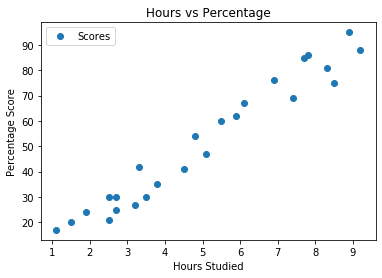

In [7]:
student_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [9]:
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:,-1].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

<h4><b>Training of data</b></h4>

In [16]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")


Training complete.


<h4><b>Plotting the regression line</b></h4>

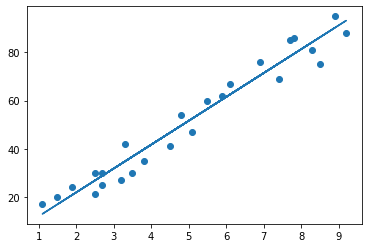

In [17]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [18]:
pred_test=regressor.predict(X_test)
pred_train = regressor.predict(X_train)

<h4><b> Comparing Actual vs Predicted</b></h4>

In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted':pred_test})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<h4><b> Training and Testing score</b></h4>

In [20]:
print("Training score:",r2_score(y_train,pred_train))
print("Testing score :",r2_score(y_test,pred_test))

Training score: 0.9515510725211553
Testing score : 0.9454906892105355


<h4><b>Evaluation of model</b></h4>

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

Mean Absolute Error: 4.18385989900298
Mean Squared Error: 21.598769307217413
Root Mean Squared Error: 4.647447612100368


In [23]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict(np.array([hours]).reshape(1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
